In [1]:
import pandapower as pp
from pandapower.plotting.plotly import simple_plotly
import pandas as pd
# creating network
net = pp.create_empty_network() 
#A local excel file that contains all information is used

In [2]:
#create 18 buses
bus_df=pd.read_excel('Balearic_islands_my_stuff.xlsx',sheet_name=0)

b = []

for i in bus_df['bus_id']:
    b.append(pp.create_bus(net, vn_kv = bus_df.loc[bus_df['bus_id']==i, 'vn_kv'].values[0], name = bus_df.loc[bus_df['bus_id']==i, 'name'].values[0], geodata = eval(bus_df.loc[bus_df['bus_id']==i, 'geodata'].values[0])))
    

In [3]:
# create the grid connection point to mainland
connect_bus = b[1]
vm_pu = 1

pp.create_ext_grid(net, bus=connect_bus, vm_pu=vm_pu, name = "Slack bus")


0

In [4]:
net.bus

,name,vn_kv,type,zone,in_service
0,Ibiza (+ Formentura),132.0,b,None,True
1,Santa Ponca (132),132.0,b,None,True
2,Santa Ponca (220),220.0,b,None,True
3,Valldurgent,220.0,b,None,True
4,Son Reus,220.0,b,None,True
5,Portol (Cas Tresorer) (220),220.0,b,None,True
6,Portol (Cas Tresorer) (66),66.0,b,None,True
7,Son Orlandis,220.0,b,None,True
8,Llubi,220.0,b,None,True
9,Murterar,220.0,b,None,True


In [5]:
# create trafos

# bus 1 Santa Ponca (132) / bus 2 Santa Ponca (220)
#hv_bus = b[2]
#lv_bus = b[1]
# used parameters from 100 MVA 220/110 kV standard type
#sn_mva = 450      ###check
#vn_hv_kv = 132
#vn_lv_kv = 220
#vk_percent = 12
#vkr_percent = 0.26
#pfe_kw = 55
#i0_percent = 0.06 
#pp.create_transformer(net, hv_bus=b[2], lv_bus=b[1], std_type='100 MVA 220/110 kV')
pp.create_transformer_from_parameters(net, hv_bus=b[2], lv_bus=b[1], sn_mva=450, vn_hv_kv=220, vn_lv_kv=132, vkr_percent=0.26, vk_percent=12, pfe_kw=55, i0_percent=0.06)


# bus 5 Portol (Cas Tresorer) (220) / bus 6 Portol (Cas Tresorer) (66)
#hv_bus = b[5]
#lv_bus = b[6]

# from gyubin's pdf
#sn_mva = 125
#vn_hv_kv = 220
#vn_lv_kv = 66
# used parameters from 100 MVA 220/110 kV standard type
#vk_percent = 12
#vkr_percent = 0.26
#pfe_kw = 55
#i0_percent = 0.06
#pp.create_transformer(net, hv_bus=b[5], lv_bus=b[6], std_type='100 MVA 220/110 kV')
#pp.create_transformer_from_parameters(net, hv_bus=hv_bus, lv_bus=lv_bus, sn_mva=sn_mva, vn_hv_kv=vn_hv_kv, vn_lv_kv=vn_lv_kv, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)
pp.create_transformer_from_parameters(net, hv_bus=b[5], lv_bus=b[6], sn_mva=125, vn_hv_kv=220, vn_lv_kv=66, vkr_percent=0.26, vk_percent=12, pfe_kw=55, i0_percent=0.06)


# bus 10 Es Bessons (220) /  bus 11 Es Bessons (132)
#hv_bus = b[10]
#lv_bus = b[11]
# used parameters from 100 MVA 220/110 kV standard type
#sn_mva = 320      ###check
#vn_hv_kv = 220
#vn_lv_kv = 132
#vk_percent = 12
#vkr_percent = 0.26
#pfe_kw = 55
#i0_percent = 0.06
#pp.create_transformer(net, hv_bus=b[10], lv_bus=b[11], std_type='100 MVA 220/110 kV')
pp.create_transformer_from_parameters(net, hv_bus=b[10], lv_bus=b[11], sn_mva=320, vn_hv_kv=220, vn_lv_kv=132, vkr_percent=0.26, vk_percent=12, pfe_kw=55, i0_percent=0.06)



2

In [6]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,...,tap_neutral,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service
0,None,None,2,1,450.0,220.0,132.0,12.0,0.26,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True
1,None,None,5,6,125.0,220.0,66.0,12.0,0.26,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True
2,None,None,10,11,320.0,220.0,132.0,12.0,0.26,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True


In [7]:
#create the lines
line_df=pd.read_excel('Balearic_islands_my_stuff.xlsx',sheet_name=5)

l = []


for i in line_df.index:
    pp.create_line_from_parameters(net, 
                                 from_bus=b[int(line_df.loc[i, 'from_bus'])],
                                 to_bus=b[int(line_df.loc[i, 'to_bus'])],
                                 length_km=line_df.loc[i, 'length_km'],
                                 r_ohm_per_km=line_df.loc[i, 'r_ohm_per_km'],
                                 x_ohm_per_km=line_df.loc[i, 'x_ohm_per_km'],
                                 c_nf_per_km=line_df.loc[i, 'c_nf_per_km'],
                                 max_i_ka=line_df.loc[i, 'max_i_ka'],
                                 geodata=[eval(line_df.loc[i,'geo_from']),eval(line_df.loc[i,'geo_to'])]
                                 ) 
    #geodata = eval(bus_df.loc[bus_df['bus_id']==i, 'geodata'].values[0]

In [8]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,None,0,1,126.000000,0.088333,0.131880,1.600000e-09,0.0,0.430,1.0,1,None,True
1,None,None,2,3,5.599701,0.446233,0.360075,1.000000e-09,0.0,0.195,1.0,1,None,True
2,None,None,3,4,15.025144,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
3,None,None,3,4,14.897672,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
4,None,None,4,7,9.417888,0.446233,0.367368,1.000000e-09,0.0,0.145,1.0,1,None,True
5,None,None,4,8,33.830450,0.446233,0.367368,1.000000e-09,0.0,0.145,1.0,1,None,True
6,None,None,7,5,4.357733,0.047800,0.349157,1.000000e-09,0.0,0.645,1.0,1,None,True
7,None,None,7,8,28.906206,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
8,None,None,8,9,16.770224,0.071533,0.338241,1.000000e-09,0.0,0.490,1.0,1,None,True
9,None,None,8,9,16.063570,0.071533,0.338241,1.000000e-09,0.0,0.490,1.0,1,None,True


In [9]:
# create the loads

load_df=pd.read_excel('Balearic_islands_my_stuff.xlsx',sheet_name=1)


p_mw_s = 'summer_p_mw'
q_mvar_s = 'summer_q_mvar'

for i in load_df['bus_id']:
    pp.create_load(net, 
                 b[i], 
                 p_mw=load_df.loc[load_df['bus_id']==i, p_mw_s].values[0], 
                 q_mvar=load_df.loc[load_df['bus_id']==i, q_mvar_s].values[0])

In [18]:
#export load data to excel for use
net.load
pd.DataFrame(net.load).to_excel('buses_load.xlsx')

In [11]:
# create generators

gen_df=pd.read_excel('Balearic_islands_my_stuff.xlsx',sheet_name=3)

p_mw = 'gen_at_peak_demand_summer'

  
for i in gen_df['bus_connection']:
    pp.create_gen(net, 
                b[i], 
                p_mw = gen_df.loc[gen_df['bus_connection']==i, 'actual_gen_pro_rata'].values[0], 
                vm_pu=vm_pu,   # defined above
                name= gen_df.loc[gen_df['bus_connection']==i,'name'].values[0])
   

In [12]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,type
0,Elvissa+Saint Francesco,0,230.700000,1.0,NaN,NaN,NaN,1.0,False,True,None
1,Son Reus,4,303.017257,1.0,NaN,NaN,NaN,1.0,False,True,None
2,Cas Tresorer,5,280.052918,1.0,NaN,NaN,NaN,1.0,False,True,None
3,Murterar,9,369.529825,1.0,NaN,NaN,NaN,1.0,False,True,None
4,Mahon (Mao),17,113.200000,1.0,NaN,NaN,NaN,1.0,False,True,None


In [13]:
#run the network
pp.runpp(net, algorithm='gs')

In [14]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,None,0,1,126.000000,0.088333,0.131880,1.600000e-09,0.0,0.430,1.0,1,None,True
1,None,None,2,3,5.599701,0.446233,0.360075,1.000000e-09,0.0,0.195,1.0,1,None,True
2,None,None,3,4,15.025144,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
3,None,None,3,4,14.897672,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
4,None,None,4,7,9.417888,0.446233,0.367368,1.000000e-09,0.0,0.145,1.0,1,None,True
5,None,None,4,8,33.830450,0.446233,0.367368,1.000000e-09,0.0,0.145,1.0,1,None,True
6,None,None,7,5,4.357733,0.047800,0.349157,1.000000e-09,0.0,0.645,1.0,1,None,True
7,None,None,7,8,28.906206,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
8,None,None,8,9,16.770224,0.071533,0.338241,1.000000e-09,0.0,0.490,1.0,1,None,True
9,None,None,8,9,16.063570,0.071533,0.338241,1.000000e-09,0.0,0.490,1.0,1,None,True


In [15]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,55.270409,-34.106473,-52.576015,38.129151,2.694394,4.022679,0.284068,0.284068,0.284068,1.000000,4.272292,1.000000,0.000000,66.062325
1,-43.952679,24.458979,44.084992,-24.352212,0.132314,0.106767,0.132855,0.132855,0.132855,0.993586,0.683526,0.994849,0.862856,68.130824
2,-78.235100,-15.136563,78.518253,15.831975,0.283152,0.695412,0.210204,0.210204,0.210204,0.994849,0.862856,1.000000,1.312770,71.255597
3,-78.904517,-15.266079,79.190092,15.967441,0.285575,0.701362,0.212003,0.212003,0.212003,0.994849,0.862856,1.000000,1.312770,71.865294
4,0.491001,29.473094,-0.415554,-29.410981,0.075447,0.062113,0.077358,0.077358,0.077358,1.000000,1.312770,0.997854,1.457699,53.350031
5,31.763286,3.468303,-31.444850,-3.206145,0.318436,0.262158,0.083852,0.083852,0.083852,1.000000,1.312770,0.989228,0.903017,57.829287
6,-166.442590,-44.936470,166.571058,45.874866,0.128468,0.938396,0.453411,0.453411,0.453411,0.997854,1.457699,1.000000,1.747034,70.296257
7,53.803518,19.592597,-53.523936,-18.905951,0.279582,0.686645,0.150591,0.150591,0.150591,0.997854,1.457699,0.989228,0.903017,51.047900
8,-124.979057,-63.759076,125.477648,66.116633,0.498591,2.357557,0.372210,0.372210,0.372210,0.989228,0.903017,1.000000,1.659873,75.961225
9,-130.477027,-66.563910,130.997552,69.025179,0.520525,2.461268,0.388584,0.388584,0.388584,0.989228,0.903017,1.000000,1.659873,79.302845


In [17]:
net.res_load

,p_mw,q_mvar
0,175.429591,84.964429
1,113.054626,54.754854
2,113.054626,54.754854
3,113.054626,54.754854
4,113.054626,54.754854
5,113.054626,54.754854
6,113.054626,54.754854
7,113.054626,54.754854
8,113.054626,54.754854
9,113.054626,54.754854


In [17]:
#export bus data to excel for use
net.res_bus
pd.DataFrame(net.res_bus).to_excel('buses_data.xlsx')

In [19]:
net.line_geodata

,coords
0,"[(1.430833, 38.91917), (2.506454, 39.53525)]"
1,"[(2.507937, 39.53662), (2.549167, 39.58417)]"
2,"[(2.549167, 39.58417), (2.678889, 39.65083)]"
3,"[(2.549167, 39.58417), (2.678889, 39.65083)]"
4,"[(2.678889, 39.65083), (2.744444, 39.60028)]"
5,"[(2.678889, 39.65083), (3.039444, 39.67333)]"
6,"[(2.744444, 39.60028), (2.724617, 39.56686)]"
7,"[(2.744444, 39.60028), (3.039444, 39.67333)]"
8,"[(3.039444, 39.67333), (3.0925, 39.80944)]"
9,"[(3.039444, 39.67333), (3.0925, 39.80944)]"


The number of given colors (1) is smaller than the number of nodes (18) to draw! The colors will be repeated to fit.


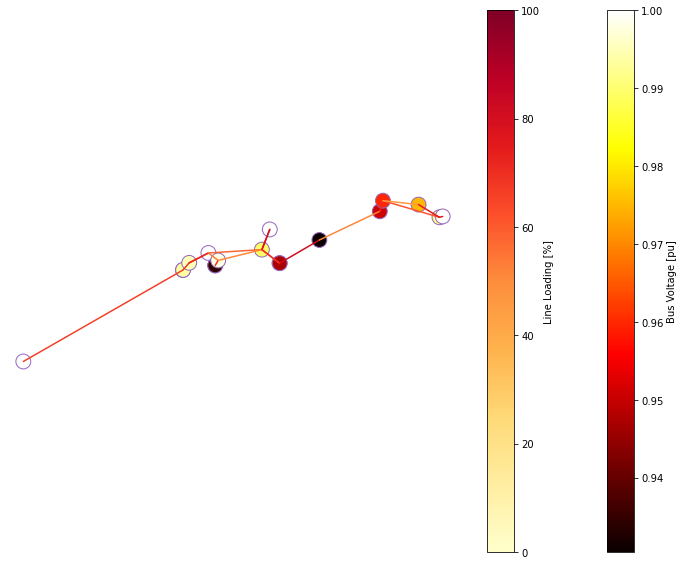

In [21]:
#plot the network, lines and buses results
import seaborn
import matplotlib.pyplot as plt

colors = seaborn.color_palette(palette=None, n_colors=None, desat=None)

bc = pp.plotting.create_bus_collection(net, buses=net.res_bus.index, size=.05, patch_type='circle', color=colors[4], cmap='hot', norm=None, \
                                       infofunc=None, picker=False, bus_geodata=None, cbar_title='Bus Voltage [pu]')

lc = pp.plotting.create_line_collection(net, lines=net.res_line.index, color=None, line_geodata=False, bus_geodata=None, use_bus_geodata=True,\
                                        infofunc=None, cmap='YlOrRd', norm=None, picker=False, z=None, cbar_title='Line Loading [%]', clim=(0,100), plot_colormap=True)


pp.plotting.draw_collections([bc, lc])

plt.show()


In [22]:
import geopandas as gpd
from pandapower import plotting
from pandapower.plotting import simple_plotly, pf_res_plotly
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import math
import numba



In [23]:
#export the results into the shapefile needed for QGIS using geopandas
pd_line = pd.DataFrame(net.line_geodata)

pd_bus = pd.DataFrame(net.res_bus)

gdf_busloc = gpd.GeoDataFrame(net.bus_geodata, geometry=gpd.points_from_xy(net.bus_geodata.x, net.bus_geodata.y))


pd_bus['geometry'] = gdf_busloc['geometry']

gdf_businfo = gpd.GeoDataFrame(pd_bus, crs="EPSG:4326")




l1 = [*range(0, 19, 1)]
l2 = [*range(0, 19, 1)]


for i in range(0,19) :
    l1[i] = LineString(pd_line['coords'][i])
    l2[i] = i
                    
d = {'col1': l2, 'geometry': l1}


df=pd.DataFrame(d)

pd_lineinfo = pd.DataFrame(net.res_line)

pd_lineinfo['geometry'] = df['geometry']


gdf_lineloc = gpd.GeoDataFrame(pd_lineinfo, crs="EPSG:4326") 

gdf_lineloc.to_file('lines_Pan_no_solar_final.shp')
gdf_businfo.to_file('bus_Pan_no_solar_final.shp')



C:\Users\Cloudsurfers\anaconda3\envs\geo_new\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\CLOUDS~1\AppData\Local\Temp/ipykernel_21752/4191385839.py:37: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_lineloc.to_file('lines_Pan_no_solar_final.shp')
